In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le fichier mis à jour
df = pd.read_csv('all_data_for_users_with_anomalies.csv')

# Calculer le nombre total d'utilisateurs uniques
total_users = df['user_number'].nunique()

print(f"Nombre total d'utilisateurs : {total_users}")
# Replace NaN in the 'type' column with "pas d'anomalie"
df2['type'] = df2['type'].fillna('pas d\'anomalie')

df

Nombre total d'utilisateurs : 68


,user_number,datetime,Consommation,cluster,anomalie,type
0,0_39,2016-03-01 01:02:47,7,0,0,pas d'anomalie
1,0_39,2016-03-01 02:02:47,8,0,0,pas d'anomalie
2,0_39,2016-03-01 03:02:45,3,0,0,pas d'anomalie
3,0_39,2016-03-01 04:02:45,0,0,0,pas d'anomalie
4,0_39,2016-03-01 05:02:45,0,0,0,pas d'anomalie
...,...,...,...,...,...,...
319104,2_75,2017-02-12 19:53:03,0,2,0,pas d'anomalie
319105,2_75,2017-02-12 20:53:03,0,2,0,pas d'anomalie
319106,2_75,2017-02-12 21:53:02,0,2,0,pas d'anomalie
319107,2_75,2017-02-12 22:53:02,0,2,0,pas d'anomalie


In [28]:
# Calculer le nombre total d'utilisateurs uniques
total_users = df['user_number'].nunique()
print(f"Nombre total d'utilisateurs : {total_users}")

# Identifier les utilisateurs ayant des lignes d'anomalie
users_with_anomalies = df.loc[df['anomalie'] == 1, 'user_number'].unique()

# Exclure les utilisateurs avec des anomalies
users_without_anomalies = df.loc[~df['user_number'].isin(users_with_anomalies), 'user_number'].nunique()

print(f"Nombre d'utilisateurs sans anomalies : {users_without_anomalies}")

Nombre total d'utilisateurs : 68
Nombre d'utilisateurs sans anomalies : 0


In [19]:
# Afficher une seule fois chaque type sans répétition, y compris 0
types_uniques = df['type'].dropna().unique()

# Afficher les types
print("Types uniques dans la colonne 'type' :")
for type_value in types_uniques:
    print(type_value)

Types uniques dans la colonne 'type' :
pas d'anomalie
prb de retour d/eau
Coupure d'eau
Fuite de consommation
prb de compteur
Surconsommation


In [31]:

# Charger le fichier mis à jour
df2 = pd.read_csv('data\data_clusters_anomaly.csv')

# Calculer le nombre total d'utilisateurs uniques
total_users = df2['user_number'].nunique()

print(f"Nombre total d'utilisateurs : {total_users}")
# Replace NaN in the 'type' column with "pas d'anomalie"
df2['type'] = df2['type'].fillna('pas d\'anomalie')

df2

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\MSI\AppData\Local\Temp\ipykernel_13572\779624137.py:2: SyntaxWarning: invalid escape sequence '\d'
  df2 = pd.read_csv('data\data_clusters_anomaly.csv')


Nombre total d'utilisateurs : 167


,user_number,datetime,Consommation,cluster,anomalie,type
0,0_1,2016-01-03 01:19:43,0,0,0,pas d'anomalie
1,0_1,2016-01-03 02:19:43,0,0,0,pas d'anomalie
2,0_1,2016-01-03 03:19:43,0,0,0,pas d'anomalie
3,0_1,2016-01-03 04:19:43,0,0,0,pas d'anomalie
4,0_1,2016-01-03 05:39:54,0,0,0,pas d'anomalie
...,...,...,...,...,...,...
604471,2_75,2017-02-12 19:53:03,0,2,0,pas d'anomalie
604472,2_75,2017-02-12 20:53:03,0,2,0,pas d'anomalie
604473,2_75,2017-02-12 21:53:02,0,2,0,pas d'anomalie
604474,2_75,2017-02-12 22:53:02,0,2,0,pas d'anomalie


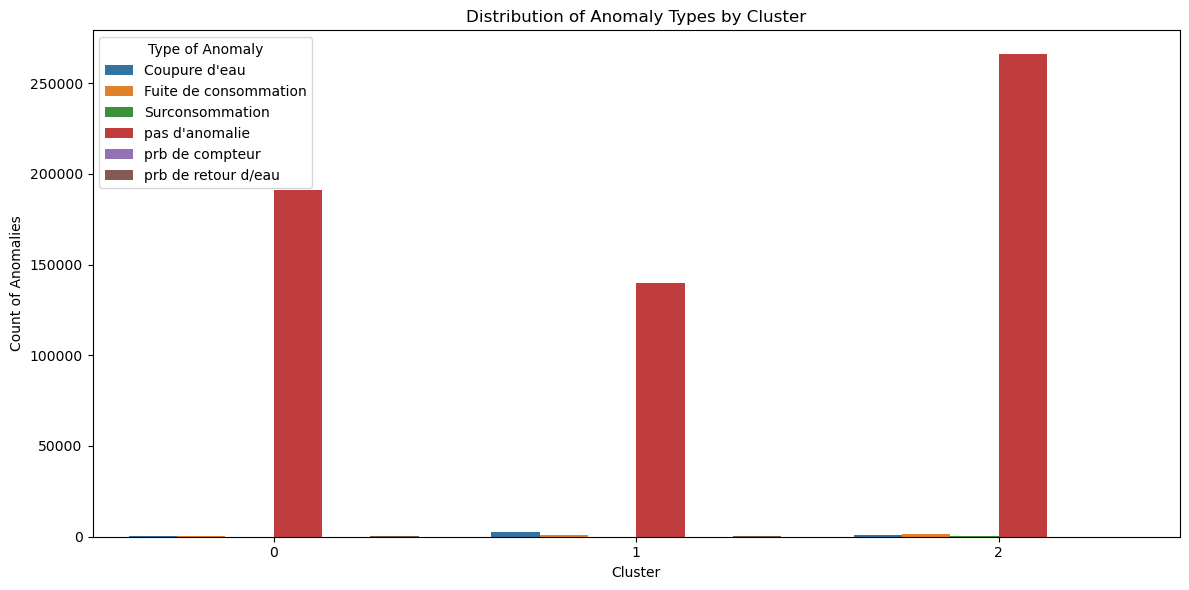

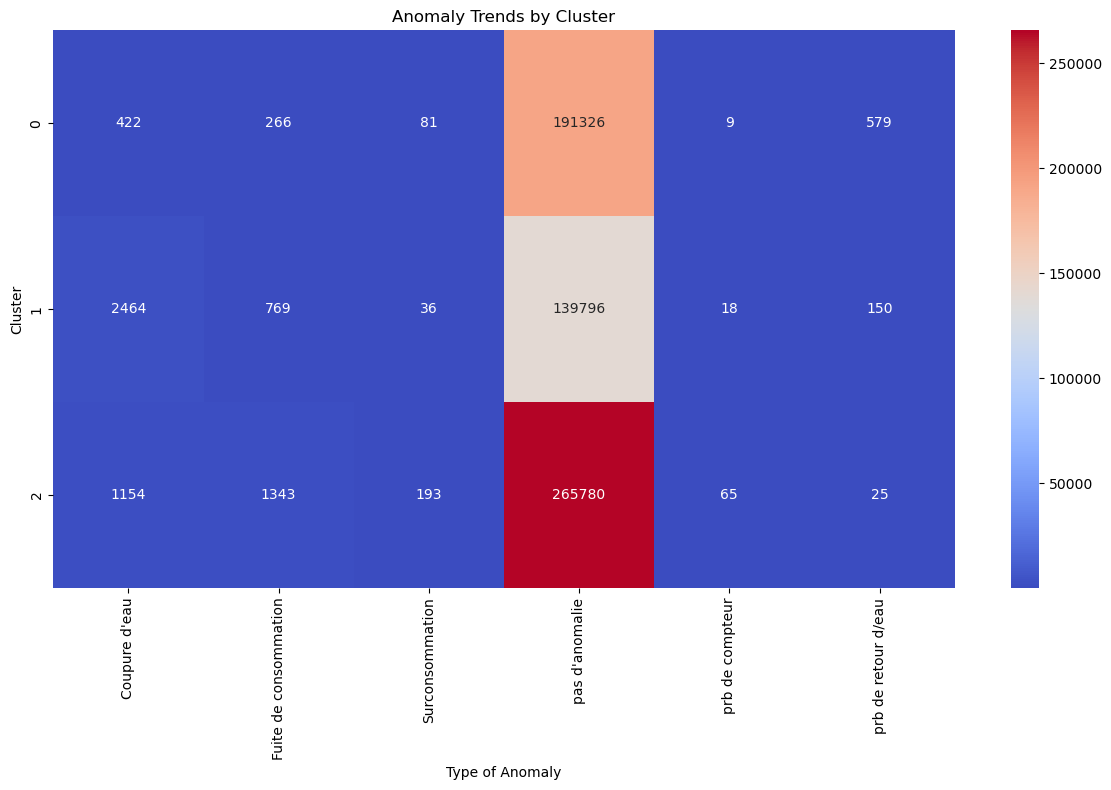

In [32]:
# Group by cluster and type of anomaly
cluster_anomalies = df2.groupby(['cluster', 'type']).size().reset_index(name='count')

# Bar plot for anomaly types by cluster
plt.figure(figsize=(12, 6))
sns.barplot(data=cluster_anomalies, x='cluster', y='count', hue='type')

# Customize the plot
plt.title('Distribution of Anomaly Types by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count of Anomalies')
plt.legend(title='Type of Anomaly')
plt.tight_layout()

# Show the plot
plt.show()

# Pivot the data for a heatmap
heatmap_data = cluster_anomalies.pivot(index='cluster', columns='type', values='count').fillna(0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='coolwarm')

# Customize the heatmap
plt.title('Anomaly Trends by Cluster')
plt.xlabel('Type of Anomaly')
plt.ylabel('Cluster')
plt.tight_layout()

# Show the heatmap
plt.show()


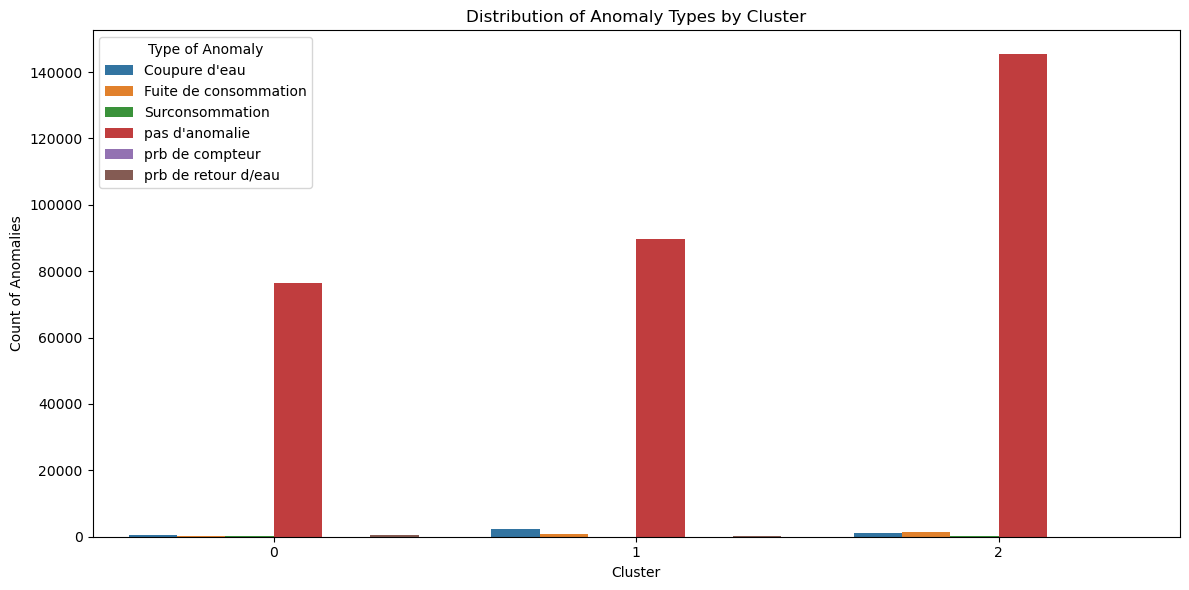

In [20]:
# Group by cluster and type of anomaly
cluster_anomalies = df.groupby(['cluster', 'type']).size().reset_index(name='count')

# Bar plot for anomaly types by cluster
plt.figure(figsize=(12, 6))
sns.barplot(data=cluster_anomalies, x='cluster', y='count', hue='type')

# Customize the plot
plt.title('Distribution of Anomaly Types by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count of Anomalies')
plt.legend(title='Type of Anomaly')
plt.tight_layout()

# Show the plot
plt.show()

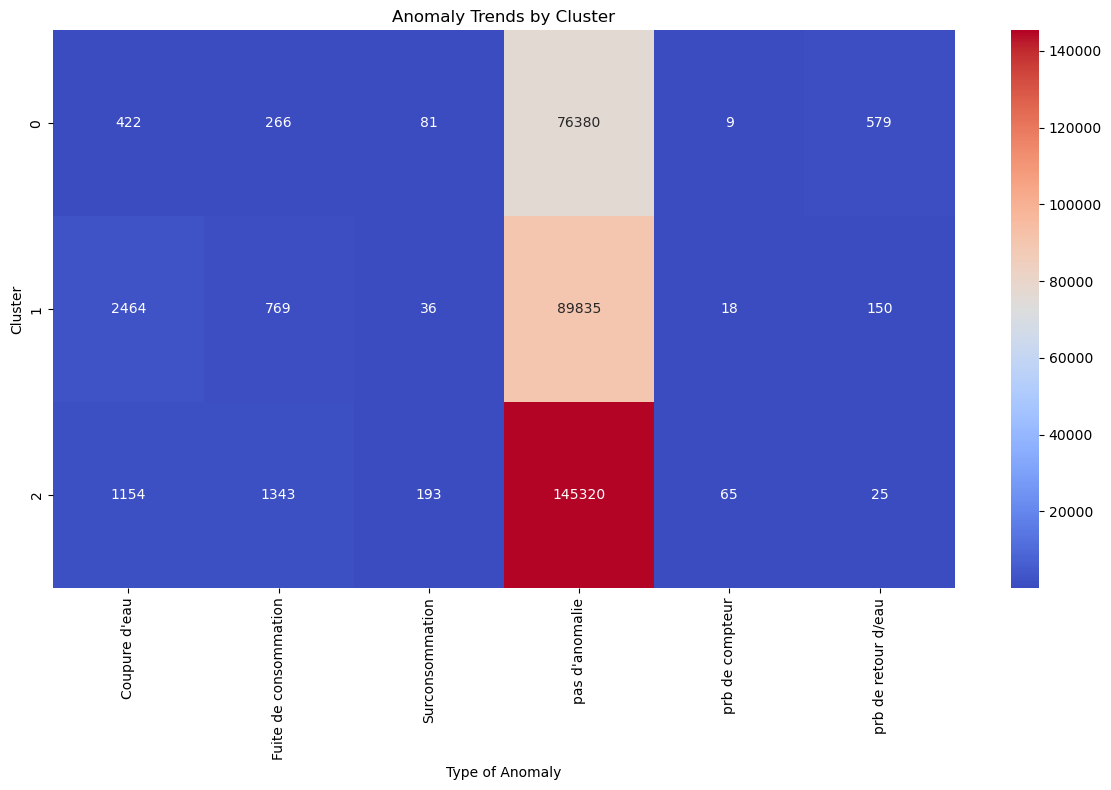

In [21]:
# Pivot the data for a heatmap
heatmap_data = cluster_anomalies.pivot(index='cluster', columns='type', values='count').fillna(0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='coolwarm')

# Customize the heatmap
plt.title('Anomaly Trends by Cluster')
plt.xlabel('Type of Anomaly')
plt.ylabel('Cluster')
plt.tight_layout()

# Show the heatmap
plt.show()


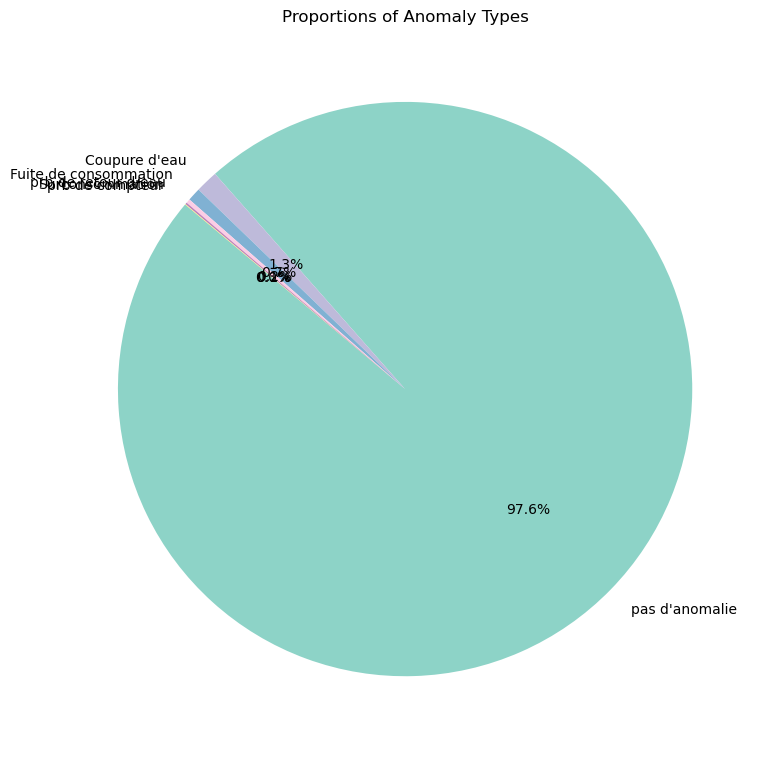

In [23]:
# Calculate proportions of anomaly types
type_proportions = df['type'].value_counts()

# Pie chart
plt.figure(figsize=(8, 8))
type_proportions.plot.pie(autopct='%1.1f%%', startangle=140, cmap='Set3')

# Customize the plot
plt.title('Proportions of Anomaly Types')
plt.ylabel('')  # Remove the y-label for better appearance
plt.tight_layout()

# Show the plot
plt.show()

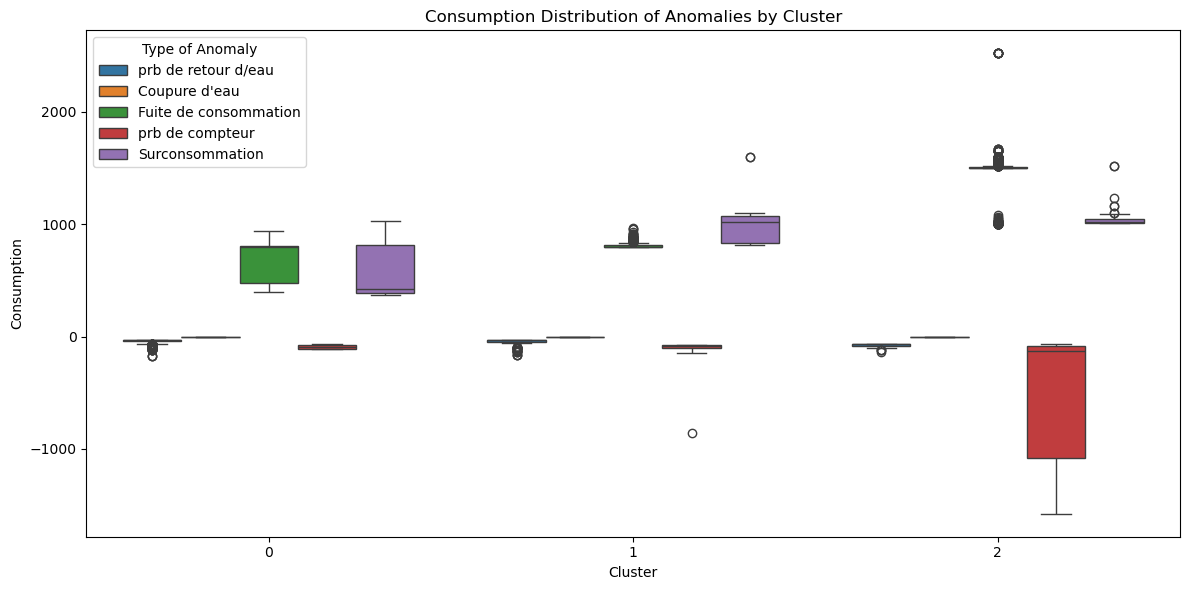

In [24]:
# Filter anomalies only
anomalies_only = df[df['type'] != "pas d'anomalie"]

# Boxplot for consumption distribution by cluster
plt.figure(figsize=(12, 6))
sns.boxplot(data=anomalies_only, x='cluster', y='Consommation', hue='type')

# Customize the plot
plt.title('Consumption Distribution of Anomalies by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Consumption')
plt.legend(title='Type of Anomaly')
plt.tight_layout()

# Show the plot
plt.show()
